## <font color='blue'>Análise de Dados em Linguagem Python Para a Área de Varejo</font>

## <font color='black'>Apresento abaixo algumas perguntas de varejo, com respostas descrita por análises gráficas. Nas primeiras linhas de código carregamos os dados, exploramos suas características e possíveis problemas. E por fim, respondemos as perguntas na sequência</font>

<ol>

<li> ## <font color='black'>Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?</font>

<li> ## <font color='black'>Qual o Total de Vendas Por Data do Pedido?</font>

<li> ## <font color='black'>Qual o Total de Vendas por Estado?</font>

<li> ## <font color='black'>Quais São as 10 Cidades com Maior Total de Vendas?</font>

<li> ## <font color='black'>Qual Segmento Teve o Maior Total de Vendas?</font>

<li> ## <font color='black'>Qual o Total de Vendas Por Segmento e Por Ano?</font>

<li> ## <font color='black'>Quantas Vendas Receberiam 15% de Desconto?/font>

<li> ## <font color='black'>Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?</font>

<li> ## <font color='black'>Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?</font>
</ol>



In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
dfpn1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']    #Primeiro, filtramos o df com os registros das categorias 
                                                            #desejadas.

In [15]:
dfpn1.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [16]:
dfpn1 = dfpn1.groupby('Cidade')['Valor_Venda'].sum()           #Em seguida agrupamos por cidade e calculamos o total de vendas. 

In [17]:
dfpn1

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          1107.646
Albuquerque     943.122
Alexandria     4879.790
                 ...   
Woonsocket      142.590
Yonkers         665.964
York            395.920
Yucaipa          50.800
Yuma             55.352
Name: Valor_Venda, Length: 480, dtype: float64

In [18]:
Venda_max = dfpn1.idxmax()                                     #Encontrando a cidade com valor de venda máximo.
print('A cidade com maior valor de vendas foi',Venda_max,'.')

A cidade com maior valor de vendas foi New York City .


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [19]:
dfpn2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum() 

In [20]:
dfpn2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

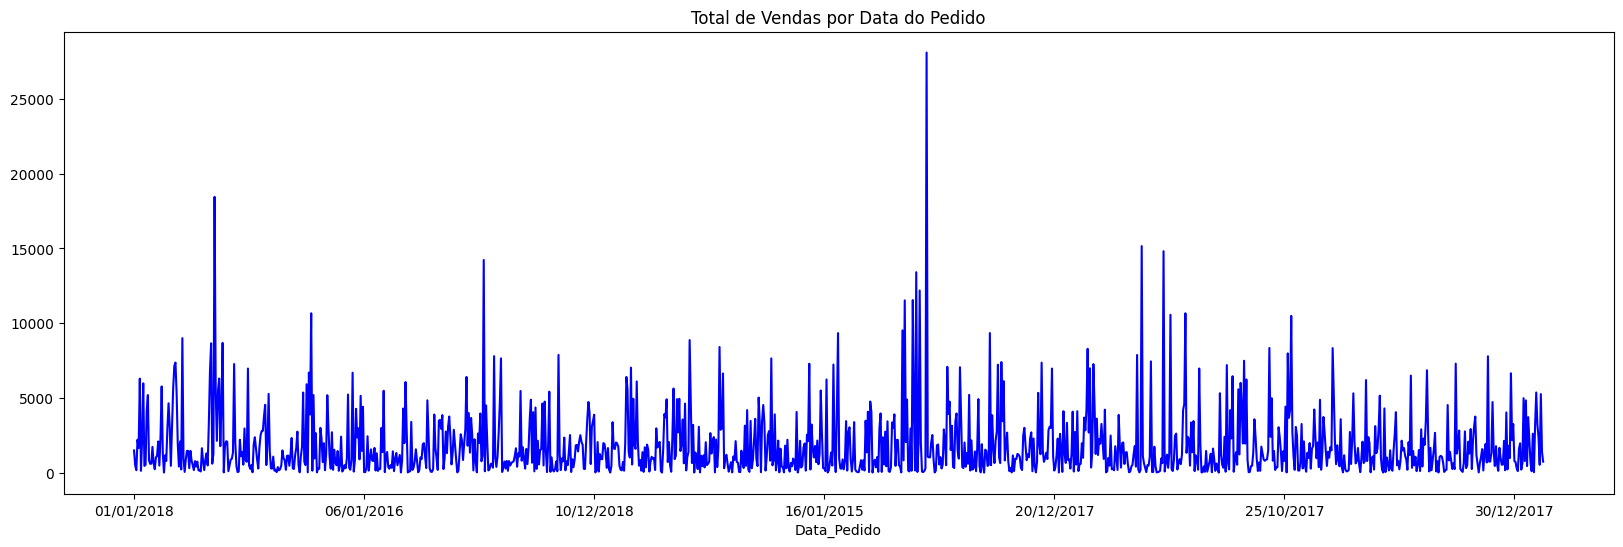

In [108]:
plt.figure(figsize = (20,6))
dfpn2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'b')
plt.title('Total de Vendas por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [24]:
dfpn3 = df_dsa[['Estado','Valor_Venda']].groupby(['Estado']).sum().reset_index()

In [25]:
dfpn3

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


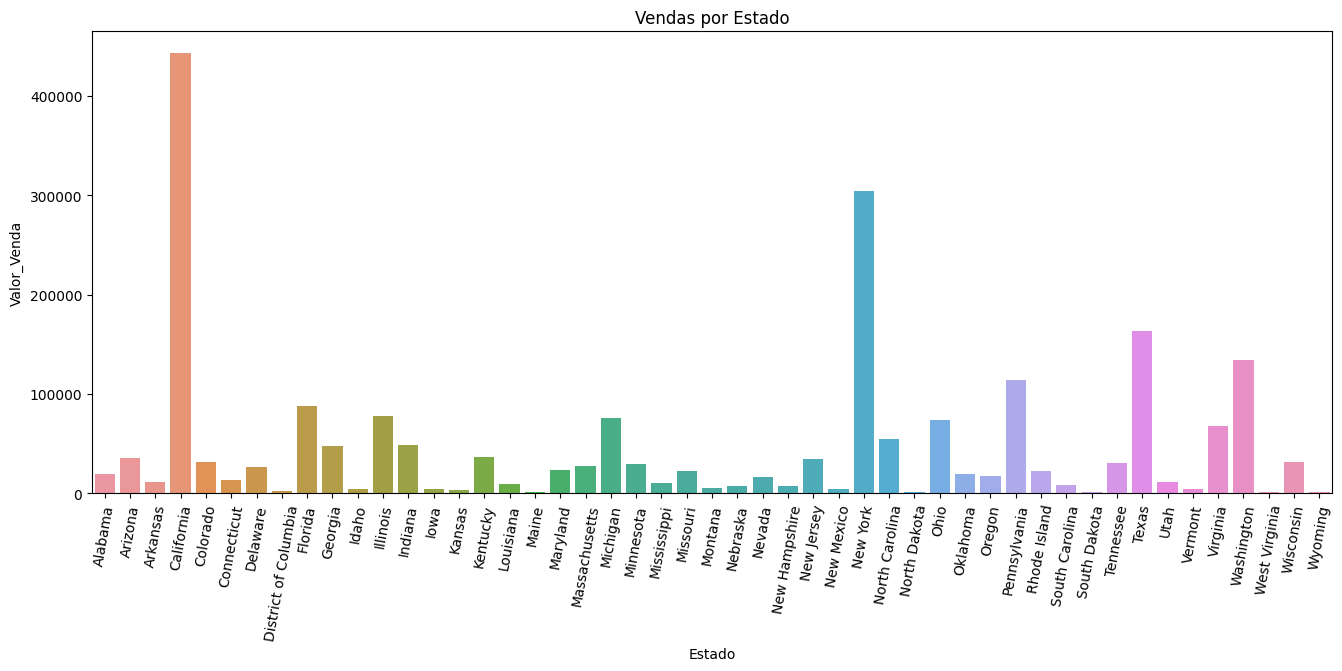

In [146]:
plt.figure(figsize = (16,6))
sns.barplot(data = dfpn3, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [150]:
dfpn4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',ascending = False).head(10)

In [153]:
dfpn4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


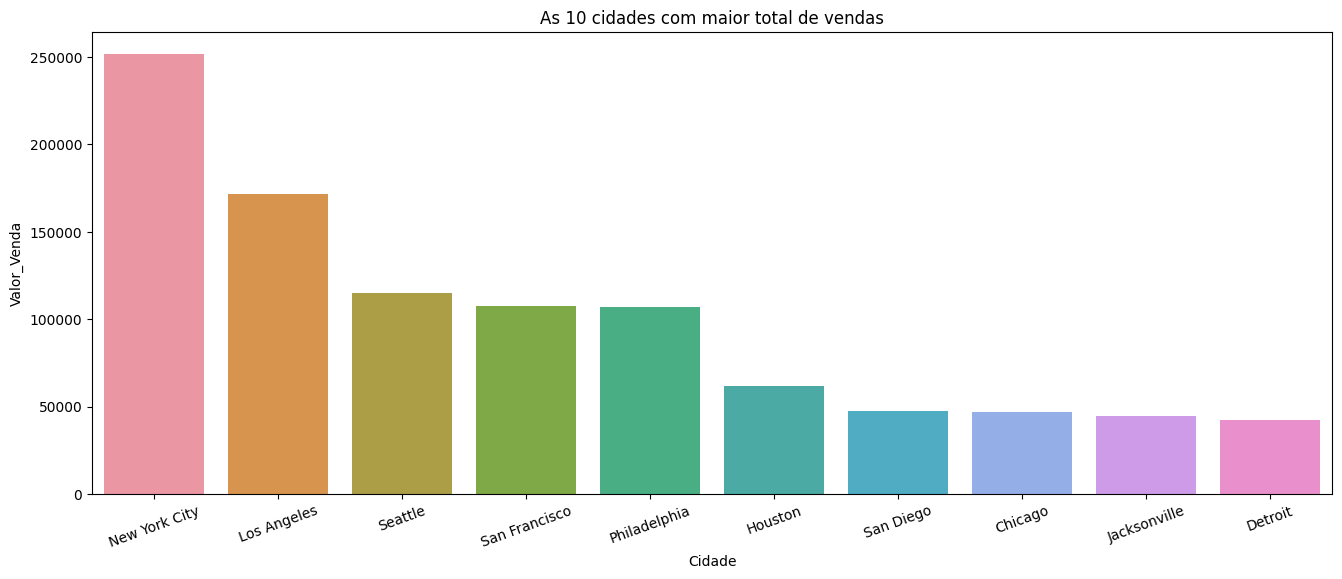

In [155]:
plt.figure(figsize = (16,6))
sns.set_palette('coolwarm')
sns.barplot(data = dfpn4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 cidades com maior total de vendas')
plt.xticks(rotation = 20)
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [160]:
dfpn5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',ascending = False).head(3)

In [161]:
dfpn5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [172]:
dfpn5['Valor_Venda'] = dfpn5['Valor_Venda'].round(1)


In [173]:
dfpn5

,Segmento,Valor_Venda
0,Consumer,1133834.0
1,Corporate,679232.0
2,Home Office,422491.0


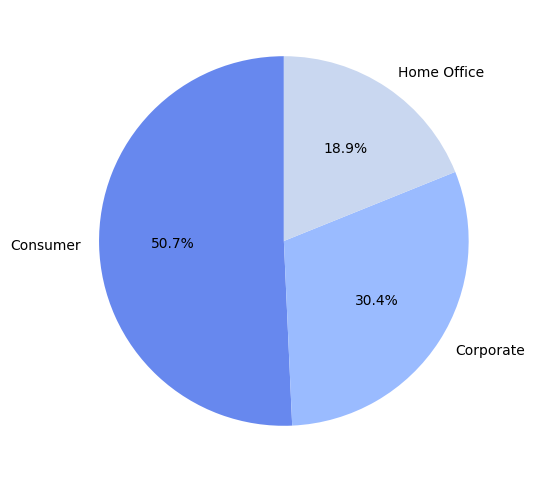

In [175]:
plt.figure(figsize = (16,6))
plt.pie(dfpn5['Valor_Venda'], labels = dfpn5['Segmento'], autopct='%.1f%%',startangle = 90)
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [26]:
#convertendo a coluna 'Data_Pedido' para uma coluna do tipo 'datetime' para obter o formato adequado.
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True) 

In [28]:
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [29]:
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

In [30]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [36]:
dfpn6 = df_dsa[['Segmento','Ano','Valor_Venda']].groupby(['Ano','Segmento']).sum()

In [38]:
dfpn6

Valor_Venda
Ano  Segmento                
2015 Consumer     256719.9166
     Corporate    125819.5957
     Home Office   88229.0878
2016 Consumer     265295.2593
     Corporate    114643.1229
     Home Office   74134.1332
2017 Consumer     288459.5572
     Corporate    203266.7398
     Home Office  103639.6270
2018 Consumer     323359.6019
     Corporate    235502.7284
     Home Office  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [39]:
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15,0.10)   #Cria uma nova coluna (dada a condicional where)
                                                                         #com os devidos valores de desconto

In [40]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [43]:
dfpn7 = df_dsa['Desconto'].value_counts()

In [48]:
dfpn7['Valor_Venda_cdesc'] = 

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [49]:
print('Um total de', dfpn7[0.15], 'receberam 15% de desconto.')

Um total de 457 receberam 15% de desconto.


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [56]:
df_dsa['Valor_Venda_cdesc'] = np.where(df_dsa['Valor_Venda'] > 1000, df_dsa['Valor_Venda'] *(1 - 0.15), 
                               df_dsa['Valor_Venda'] )

In [57]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_cdesc
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.1,22.8300
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.1,54.3200
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.1,196.7760
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.1,3.6200


In [59]:
dfpn8 = df_dsa[df_dsa['Desconto']==0.15]

In [60]:
dfpn8

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_cdesc
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015,0.15,1450.2564
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016,0.15,887.9355
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016,0.15,2620.9155
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017,0.15,932.9124
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017,0.15,875.4575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015,0.15,1384.4970
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016,0.15,3652.9974
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017,0.15,2895.6644
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017,0.15,2570.3388


In [62]:
dfpn8[['Valor_Venda','Valor_Venda_cdesc']].mean().round(2)

Valor_Venda          2116.81
Valor_Venda_cdesc    1799.29
dtype: float64

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [63]:
df_dsa['Mês'] = df_dsa['Data_Pedido'].dt.month

In [64]:
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_cdesc,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,261.9600,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,731.9400,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,14.6200,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,957.5775,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.1,22.8300,12
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.1,54.3200,12
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.1,196.7760,12
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.1,3.6200,10


In [65]:
dfpn9 = df_dsa.groupby(['Ano','Mês','Segmento'])['Valor_Venda'].agg([np.sum,np.mean,np.median])

In [66]:
dfpn9

sum        mean  median
Ano  Mês Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [67]:
anos = dfpn9.index.get_level_values(0)
meses = dfpn9.index.get_level_values(1)                #Extraindo os níveis.
segmentos = dfpn9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

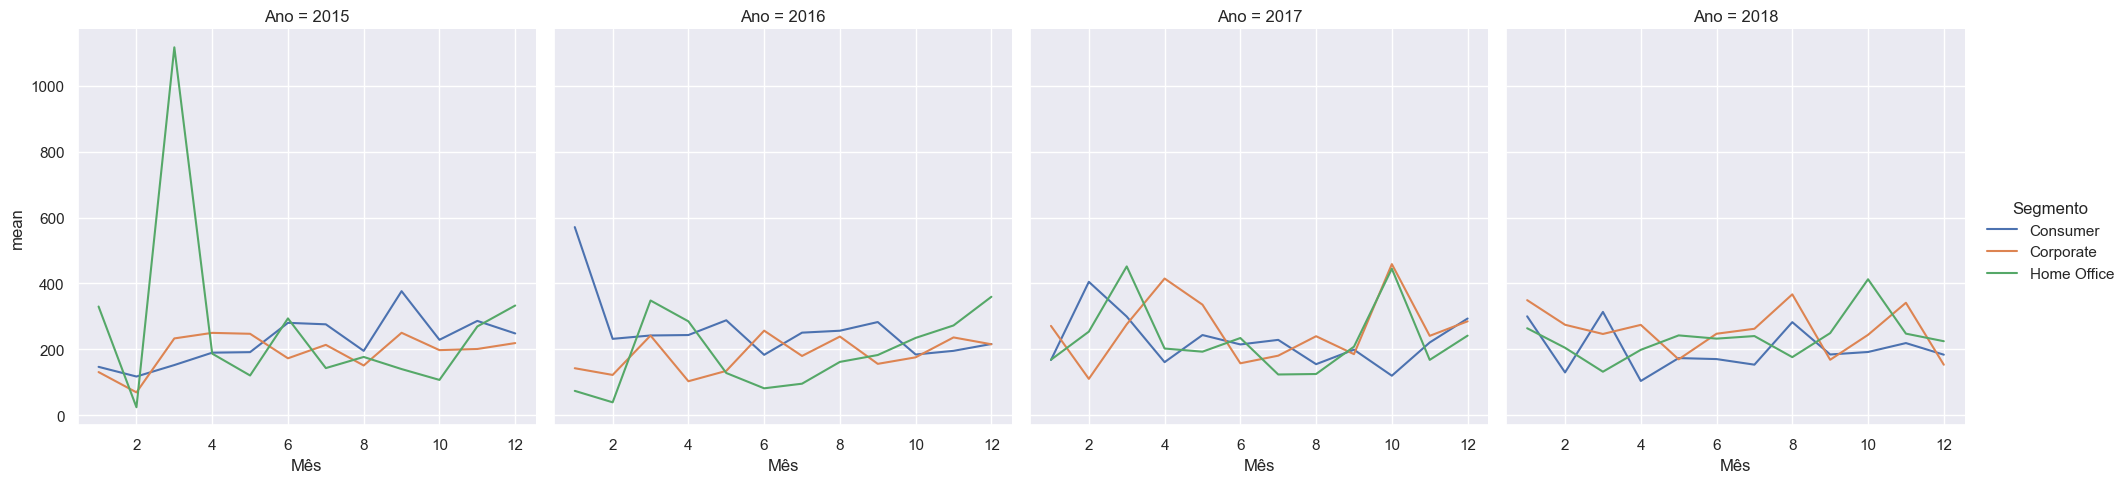

In [68]:
plt.figure(figsize = (12,6))
sns.set()           #limpa toda a configuração do seaborn utilizada anteriormente.
fig1 = sns.relplot(kind = 'line', data = dfpn9, y = 'mean', x = meses, hue = segmentos, col = anos, col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

# Fim